In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='alarm', src=FILE, fpath='../table/alarm/alarm.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.022233009338378906] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "PAP": "categorical",
    "VENTLUNG": "categorical",
    "SAO2": "categorical",
    "EXPCO2": "categorical",
    "HR": "categorical",
    "HREKG": "categorical",
    "CVP": "categorical",
    "KINKEDTUBE": "categorical",
    "BP": "categorical",
    "ERRCAUTER": "categorical",
    "PULMEMBOLUS": "categorical",
    "SHUNT": "categorical",
    "MINVOLSET": "categorical",
    "CATECHOL": "categorical",
    "ERRLOWOUTPUT": "categorical",
    "FIO2": "categorical",
    "LVEDVOLUME": "categorical",
    "INTUBATION": "categorical",
    "STROKEVOLUME": "categorical",
    "PRESS": "categorical",
    "HRBP": "categorical",
    "VENTMACH": "categorical

In [4]:
pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[0.38124918937683105] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 27 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 27, and the bound is 0.00096935
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 37/37 [00:00<00:00, 126.27it/s]
INFO:profiler.data.transformer:Number of training samples: 37000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[2.2011468410491943] Create Training Data execution time: 1.8198976516723633



In [5]:
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[2.2139298915863037] Learn Structure start

INFO:profiler.learner:use threshold 2.5571
INFO:profiler.utility:[3.0678906440734863] Learn Structure execution time: 0.8539607524871826



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[3.0954835414886475] Get Dependencies start



LVEDVOLUME -> PCWP (0.08061822584262393)
LVEDVOLUME -> HYPOVOLEMIA (0.14455974150256742)
LVEDVOLUME -> CVP (0.13788235143942243)
ERRCAUTER -> HREKG (0.21328793205220567)
ERRCAUTER,HREKG -> HRSAT (0.0807688325370074)
HREKG,HRSAT -> HR (0.13601854284220954)
ERRCAUTER,HR -> PULMEMBOLUS (0.024554437578068498)
HR,PULMEMBOLUS -> ERRLOWOUTPUT (0.08892276919520835)
HR,ERRLOWOUTPUT -> HRBP (0.05653133565216029)
HR,PULMEMBOLUS,ERRLOWOUTPUT -> ANAPHYLAXIS (0.028605678725684276)
PULMEMBOLUS,ANAPHYLAXIS -> INTUBATION (0.12115737512849281)
PULMEMBOLUS,INTUBATION -> PVSAT (0.2268714746145368)
INTUBATION,PVSAT -> VENTALV (0.08691697617568674)
PVSAT,VENTALV -> ARTCO2 (0.07656125690782238)
PVSAT,VENTALV -> VENTLUNG (0.09129783752412265)
VENTALV,VENTLUNG -> MINVOL (0.08952735797215254)
VENTLUNG -> EXPCO2 (0.17922487342964924)


INFO:profiler.utility:[3.516732931137085] Get Dependencies execution time: 0.4212493896484375



PVSAT -> SAO2 (0.05356299848428043)
PULMEMBOLUS,INTUBATION -> SHUNT (0.11033585989038469)
PULMEMBOLUS,ANAPHYLAXIS -> KINKEDTUBE (0.08186169988883792)
PULMEMBOLUS,ANAPHYLAXIS -> LVFAILURE (0.08075860185202767)
LVFAILURE -> HISTORY (0.024814924669750674)
PULMEMBOLUS -> FIO2 (0.08614180043674267)
PULMEMBOLUS -> PAP (0.14852001512501384)
PULMEMBOLUS -> DISCONNECT (0.16507001779707142)
DISCONNECT,VENTMACH -> VENTTUBE (0.11110333540116915)
VENTMACH -> MINVOLSET (0.07488303317240899)
HR -> CO (0.1855364832430347)
CO -> STROKEVOLUME (0.1929032101067284)
HR -> CATECHOL (0.10897586601762087)
{'BP': array([], dtype=object), 'PRESS': array([], dtype=object), 'INSUFFANESTH': array([], dtype=object), 'TPR': array([], dtype=object), 'LVEDVOLUME': array([], dtype=object), 'PCWP': array(['LVEDVOLUME'], dtype=object), 'HYPOVOLEMIA': array(['LVEDVOLUME'], dtype=object), 'CVP': array(['LVEDVOLUME'], dtype=object), 'ERRCAUTER': array([], dtype=object), 'HREKG': array(['ERRCAUTER'], dtype=object), 'HRSAT': 

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


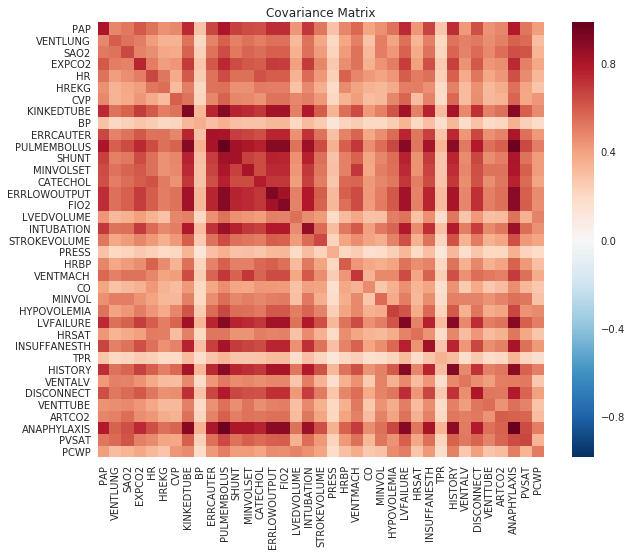

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


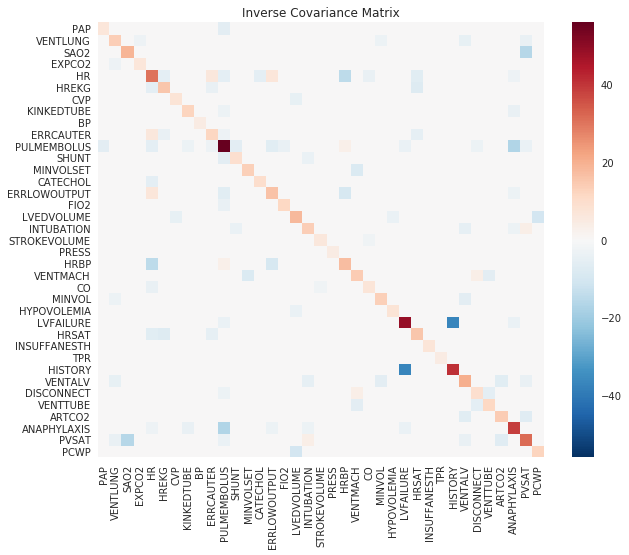

none-zero pairs of abs inv


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


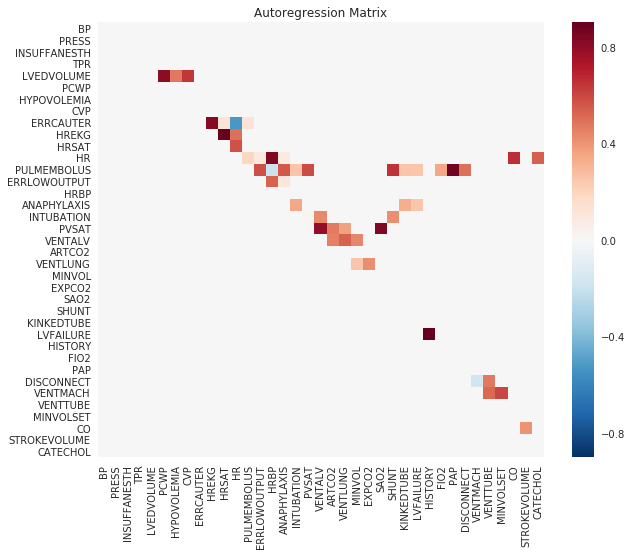

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.022233,start: Load Data,0.000000
1,0.360116,end: Load Data,0.337883
2,0.381249,start: Create Training Data,0.000000
3,2.201147,end: Create Training Data,1.819898
4,2.213930,start: Learn Structure,0.000000
5,3.067891,end: Learn Structure,0.853961
6,3.095484,start: Get Dependencies,0.000000
7,3.516733,end: Get Dependencies,0.421249
8,3.516733,total_execution_time,3.432991


In [11]:
pf.session.timer.to_csv()